#### Covid Spread relation with Urbanization and Population Density

In this first notebook, we'll compare the spread of Covid-19 with the ratio of urban population in each country. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


data_exp = pd.read_csv('data/data_spread_rate_exp.csv')
data_time = pd.read_csv('data/data_spread_rate_time.csv')
data_repr = pd.read_csv('data/data_spread_rate_reproduction.csv')

#### Correlation between Covid-19 spread and Urbanization population ratio

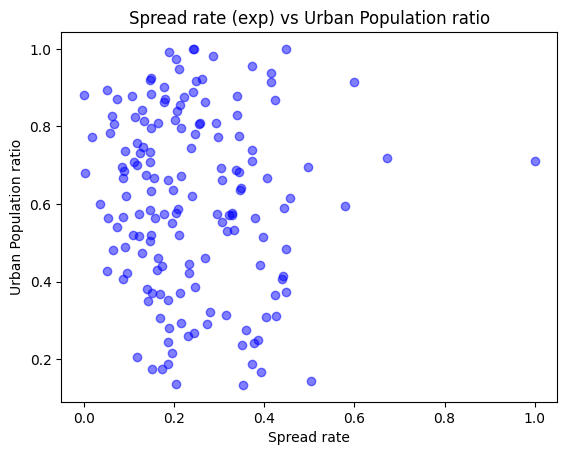

In [7]:
plt.scatter(data_exp['Spread rate'], data_exp['Urban Population']/data_exp['Total Population'], c='blue', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Urban Population ratio')
plt.title('Spread rate (exp) vs Urban Population ratio')
plt.show()

In [8]:
correxp = data_exp['Spread rate'].corr(data_exp['Urban Population']/data_exp['Total Population'])
print('Correlation coefficient using exponential spread rate: ', correxp)

Correlation coefficient using exponential spread rate:  -0.07597682859124988


Using our spread rate derived from exponential fit, the correlation is very close to zero.

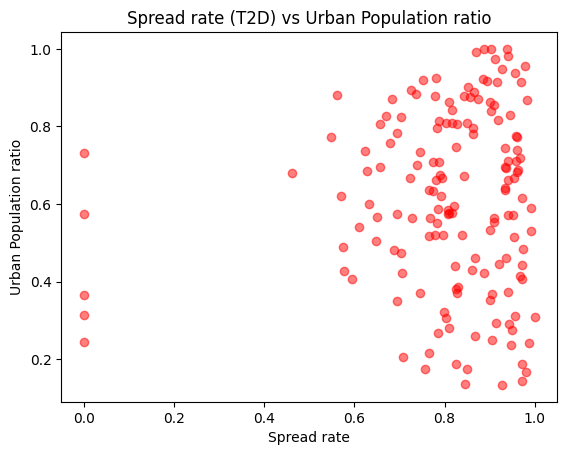

In [9]:
plt.scatter(data_time['Spread rate'], data_time['Urban Population']/data_time['Total Population'], c='red', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Urban Population ratio')
plt.title('Spread rate (T2D) vs Urban Population ratio')
plt.show()

In [10]:
corrtime = data_time['Spread rate'].corr(data_time['Urban Population']/data_time['Total Population'])
print('Correlation coefficient using time to double spread rate:', corrtime)

Correlation coefficient using time to double spread rate: 0.07239311372707102


The same goes for the correlation using the spread rate derived from the time to double the number of cases.

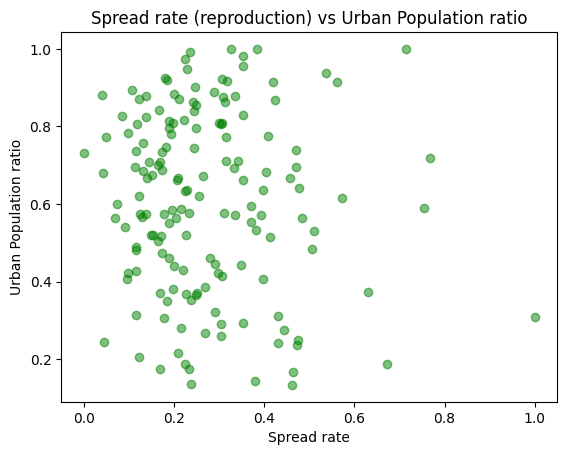

In [11]:
plt.scatter(data_repr['Spread rate'], data_repr['Urban Population']/data_repr['Total Population'], c='green', alpha=0.5)
plt.xlabel('Spread rate')
plt.ylabel('Urban Population ratio')
plt.title('Spread rate (reproduction) vs Urban Population ratio')
plt.show()

In [12]:
correpr = data_repr['Spread rate'].corr(data_repr['Urban Population']/data_repr['Total Population'])
print('Correlation coefficient using reproduction spread rate:', correpr)

Correlation coefficient using reproduction spread rate: -0.08210623412384634
